# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

Primeiras linhas do DataFrame:
   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residen

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


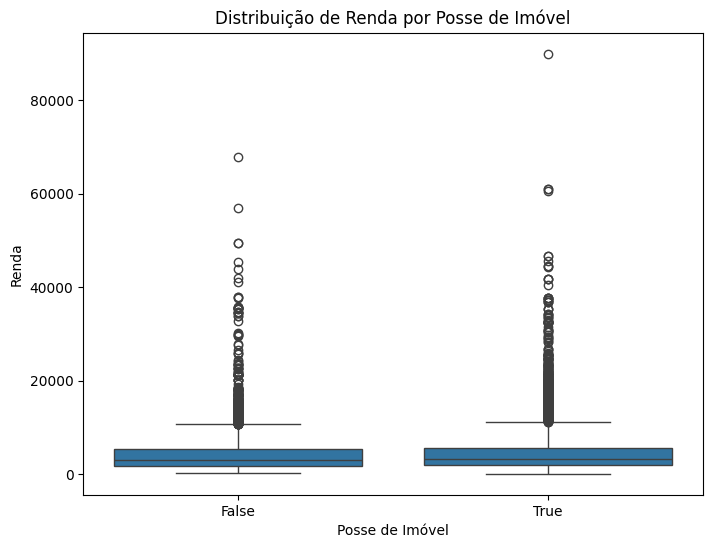

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


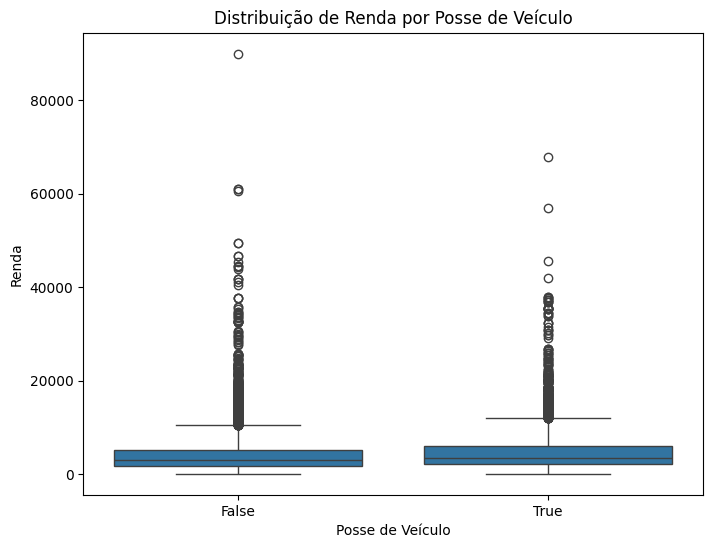


Análise final:
A posse de imóvel é uma boa preditora de renda (p < 0.05).
A posse de veículo é uma boa preditora de renda (p < 0.05).


In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv')

# Visualizando as primeiras linhas do dataframe
print("Primeiras linhas do DataFrame:")
print(df.head())

# Analisando a renda média para quem possui e não possui imóvel
imovel_renda = df.groupby('posse_de_imovel')['renda'].mean()
print("\nMédia de renda por posse de imóvel:")
print(imovel_renda)

# Analisando a renda média para quem possui e não possui veículo
veiculo_renda = df.groupby('posse_de_veiculo')['renda'].mean()
print("\nMédia de renda por posse de veículo:")
print(veiculo_renda)

# Teste t para posse de imóvel (comparando rendas de quem possui e não possui imóvel)
imovel_possui = df[df['posse_de_imovel'] == True]['renda']
imovel_nao_possui = df[df['posse_de_imovel'] == False]['renda']

t_stat_imovel, p_value_imovel = stats.ttest_ind(imovel_possui, imovel_nao_possui)
print("\nTeste t para posse de imóvel:")
print(f"T-statistic: {t_stat_imovel}, P-value: {p_value_imovel}")

# Teste t para posse de veículo (comparando rendas de quem possui e não possui veículo)
veiculo_possui = df[df['posse_de_veiculo'] == True]['renda']
veiculo_nao_possui = df[df['posse_de_veiculo'] == False]['renda']

t_stat_veiculo, p_value_veiculo = stats.ttest_ind(veiculo_possui, veiculo_nao_possui)
print("\nTeste t para posse de veículo:")
print(f"T-statistic: {t_stat_veiculo}, P-value: {p_value_veiculo}")

# Visualizando a distribuição de renda por posse de imóvel
plt.figure(figsize=(8, 6))
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title('Distribuição de Renda por Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Renda')
plt.show()

# Visualizando a distribuição de renda por posse de veículo
plt.figure(figsize=(8, 6))
sns.boxplot(x='posse_de_veiculo', y='renda', data=df)
plt.title('Distribuição de Renda por Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')
plt.show()

# Printando a análise final
print("\nAnálise final:")
if p_value_imovel < 0.05:
    print("A posse de imóvel é uma boa preditora de renda (p < 0.05).")
else:
    print("A posse de imóvel não é uma boa preditora de renda (p >= 0.05).")

if p_value_veiculo < 0.05:
    print("A posse de veículo é uma boa preditora de renda (p < 0.05).")
else:
    print("A posse de veículo não é uma boa preditora de renda (p >= 0.05).")

# Relatório de Análise de Renda

## Objetivo

Analisar se as variáveis qualitativas "posse de imóvel" e "posse de veículo" são boas preditoras de renda.

## Dados

Utilizando a base `previsao_de_renda.csv`, as variáveis relevantes são:

- **posse_de_veiculo**: True (possui) ou False (não possui)
- **posse_de_imovel**: True (possui) ou False (não possui)
- **renda**: Renda mensal do indivíduo

## Resultados

### Renda Média

- **Posse de Imóvel**:
  - Não possui: R$ 4.426,97
  - Possui: R$ 4.721,05

- **Posse de Veículo**:
  - Não possui: R$ 4.390,51
  - Possui: R$ 4.992,58

### Testes Estatísticos

- **Posse de Imóvel**:
  - T-statistic: 3.65, P-value: 0.00026 (significativo)
  
- **Posse de Veículo**:
  - T-statistic: 7.78, P-value: 7.62e-15 (altamente significativo)

## Conclusão

Ambas as variáveis, posse de imóvel e posse de veículo, mostram diferenças significativas na renda. Indivíduos que possuem imóvel ou veículo têm renda média maior, indicando que essas variáveis são boas preditoras de renda.
